In [16]:
# Импорт библиотек
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Загрузка данных
FILE_ID = "1NPjKJoVKQWytdYYEIFn7WQGVL6Tljo_L" 
URL = f"https://drive.google.com/uc?id={FILE_ID}"
OUTPUT = "dataset.csv"  
gdown.download(URL, OUTPUT, quiet=False)
df = pd.read_csv('dataset.csv')

Downloading...
From: https://drive.google.com/uc?id=1NPjKJoVKQWytdYYEIFn7WQGVL6Tljo_L
To: C:\Users\cdolg\my_project\dataset.csv
100%|███████████████████████████████████████████████████████████████████████████████| 550k/550k [00:00<00:00, 8.07MB/s]


EDA Анализ Метеорологических Данных
1. Введение и Цели Анализа


1. Оценить качество и полноту метеорологических данных
2. Выявить аномалии и выбросы в измерениях
3. Проанализировать структуру временного ряда
4. Подготовить данные для дальнейшего анализа

In [ ]:

print(f"\n Период данных: {df['Date'].min()} - {df['Date'].max()}")
print(f" Рразмер датасета: {df.shape[0]} строк × {df.shape[1]} столбцов")


 ПЕРИОД ДАННЫХ: 2009-01-01 - 2020-07-28
 РАЗМЕР ДАТАСЕТА: 3902 строк × 23 столбцов


Начнем анализ метеорологических данных, которые охватывают значительный временной период. Важно понять структуру данных и выявить потенциальные проблемы перед углубленным анализом.

2. Структура Данных

In [ ]:
# Просмотр структуры данных
print(" Первые 5 строк датасета:")
display(df.head())

print("\n Информация о типах:")
df.info()


 ПЕРВЫЕ 5 СТРОК ДАННЫХ:


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665



 ИНФОРМАЦИЯ О ТИПАХ ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (°deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Maximum rain per minute   3902 non-null   float64
 11  Maximum temperature (°F)  3902 non-null   float64
 12  Minimum temperature (°F)  3902 non-null   float64
 13  Maximum humidity (%)      3902 non

In [ ]:
# Анализ структуры столбцов
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f" Переменные формата числа ({len(numeric_cols)}):")
print([col for col in numeric_cols[:10]])  # Показываем первые 10

print(f"\n Переменные формата категории ({len(categorical_cols)}):")
print(categorical_cols)

 ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ (21):
['Average temperature (°F)', 'Average humidity (%)', 'Average dewpoint (°F)', 'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)', 'Average direction (°deg)', 'Rainfall for month (in)', 'Rainfall for year (in)', 'Maximum rain per minute']

 КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ (2):
['Date', 'Date1']


Данные содержат преимущественно числовые метеорологические измерения. Видно, что есть временные метки и различные погодные параметры. Структура выглядит логичной для метеорологического датасета.

3. Полнота Данных

In [ ]:
# Анализ пропущенных значений
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Пропуски': missing_data,
    'Процент': missing_percent
}).sort_values('Пропуски', ascending=False)

# Визуализация пропущенных значений
plt.figure(figsize=(12, 6))
missing_plot_data = missing_df[missing_df['Пропуски'] > 0].head(10)

if len(missing_plot_data) > 0:
    plt.bar(missing_plot_data.index, missing_plot_data['Процент'])
    plt.title('Топ-10 переменных с наибольшим процентом пропусков', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Процент пропусков (%)')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" Пропущенных значений не обнаружено")

print(" Сводка по пропускам:")
display(missing_df[missing_df['Пропуски'] > 0].head(10))


 Пропущенных значений не обнаружено
 СВОДКА ПО ПРОПУСКАМ:


,Пропуски,Процент


<Figure size 1200x600 with 0 Axes>

In [ ]:
print(" Приведение типов:")

# Анализ текущих типов данных
print(" Типы данных до:")
print(df.dtypes)

# Оптимизированное преобразование временных меток в datetime
print("\n Преобращования временных меток в datatime:")

# Одновременное преобразование всех дат-колонок
date_columns = ['Date', 'Date1']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

print(" Преобразование завершено")

# Проверка результатов
print("\n Результаты:")
for col in date_columns:
    print(f"{col}: {df[col].min()} - {df[col].max()}")

print("\n Типы данных после:")
print(df[date_columns].dtypes)

# Оптимизированный анализ полноты временного ряда
date_min, date_max = df['Date'].min(), df['Date'].max()
date_range = pd.date_range(start=date_min, end=date_max)
missing_dates = date_range.difference(df['Date'])
unique_dates_count = df['Date'].nunique()
completeness = (1 - len(missing_dates) / len(date_range)) * 100

print(f"\n Полнота временного ряда:")
print(f" Всего дней в периоде: {len(date_range)}")
print(f" Дней с данными: {unique_dates_count}")
print(f" Пропущенных дней: {len(missing_dates)}")
print(f" Полнота временного ряда: {completeness:.1f}%")

 ПРИВЕДЕНИЕ ТИПОВ ДАННЫХ:
 ТИПЫ ДАННЫХ ДО ПРЕОБРАЗОВАНИЯ:
Date                         object
Average temperature (°F)    float64
Average humidity (%)        float64
Average dewpoint (°F)       float64
Average barometer (in)      float64
Average windspeed (mph)     float64
Average gustspeed (mph)     float64
Average direction (°deg)    float64
Rainfall for month (in)     float64
Rainfall for year (in)      float64
Maximum rain per minute     float64
Maximum temperature (°F)    float64
Minimum temperature (°F)    float64
Maximum humidity (%)        float64
Minimum humidity (%)        float64
Maximum pressure            float64
Minimum pressure            float64
Maximum windspeed (mph)     float64
Maximum gust speed (mph)    float64
Maximum heat index (°F)     float64
Date1                        object
Month                         int64
diff_pressure               float64
dtype: object

 ПРЕОБРАЗОВАНИЕ ВРЕМЕННЫХ МЕТОК В DATETIME:
 Преобразование завершено

 РЕЗУЛЬТАТЫ ПРЕОБРАЗОВАНИЯ:


Проанализировав полноту данных, можно заключить, что временной ряд имеет высокую полноту, что хорошо для анализа. Но все равно данные имеют пропуски во днях.

4. Анализ Числовых Переменных

In [ ]:
# Выбор ключевых переменных для анализа
key_metrics = [
    "Average temperature (°F)",
    "Average humidity (%)",
    "Average dewpoint (°F)",
    "Average barometer (in)",
    "Average windspeed (mph)",
    "Average gustspeed (mph)",
    "Average direction (°deg)",
    "Rainfall for month (in)",
    "Rainfall for year (in)",
    "Maximum rain per minute",
    "Maximum temperature (°F)",
    "Minimum temperature (°F)",  
    "Maximum humidity (%)",
    "Minimum humidity (%)",
    "Maximum pressure",
    "Minimum pressure",
    "Maximum windspeed (mph)",
    "Maximum gust speed (mph)",
    "Maximum heat index (°F)",
    "diff_pressure",
]

print(" Основная статистика ключевых переменных:")
display(df[key_metrics].describe())

 ОСНОВНАЯ СТАТИСТИКА КЛЮЧЕВЫХ ПЕРЕМЕННЫХ:


,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),diff_pressure
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,57.561661,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,0.343829
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,17.755874,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,0.407499
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-6.100000,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,43.900000,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,0.220000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,57.250000,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,0.293000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,73.200000,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,0.395000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,92.700000,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,16.602000



 ПОЛНАЯ ВИЗУАЛИЗАЦИЯ ВСЕХ МЕТЕОПЕРЕМЕННЫХ


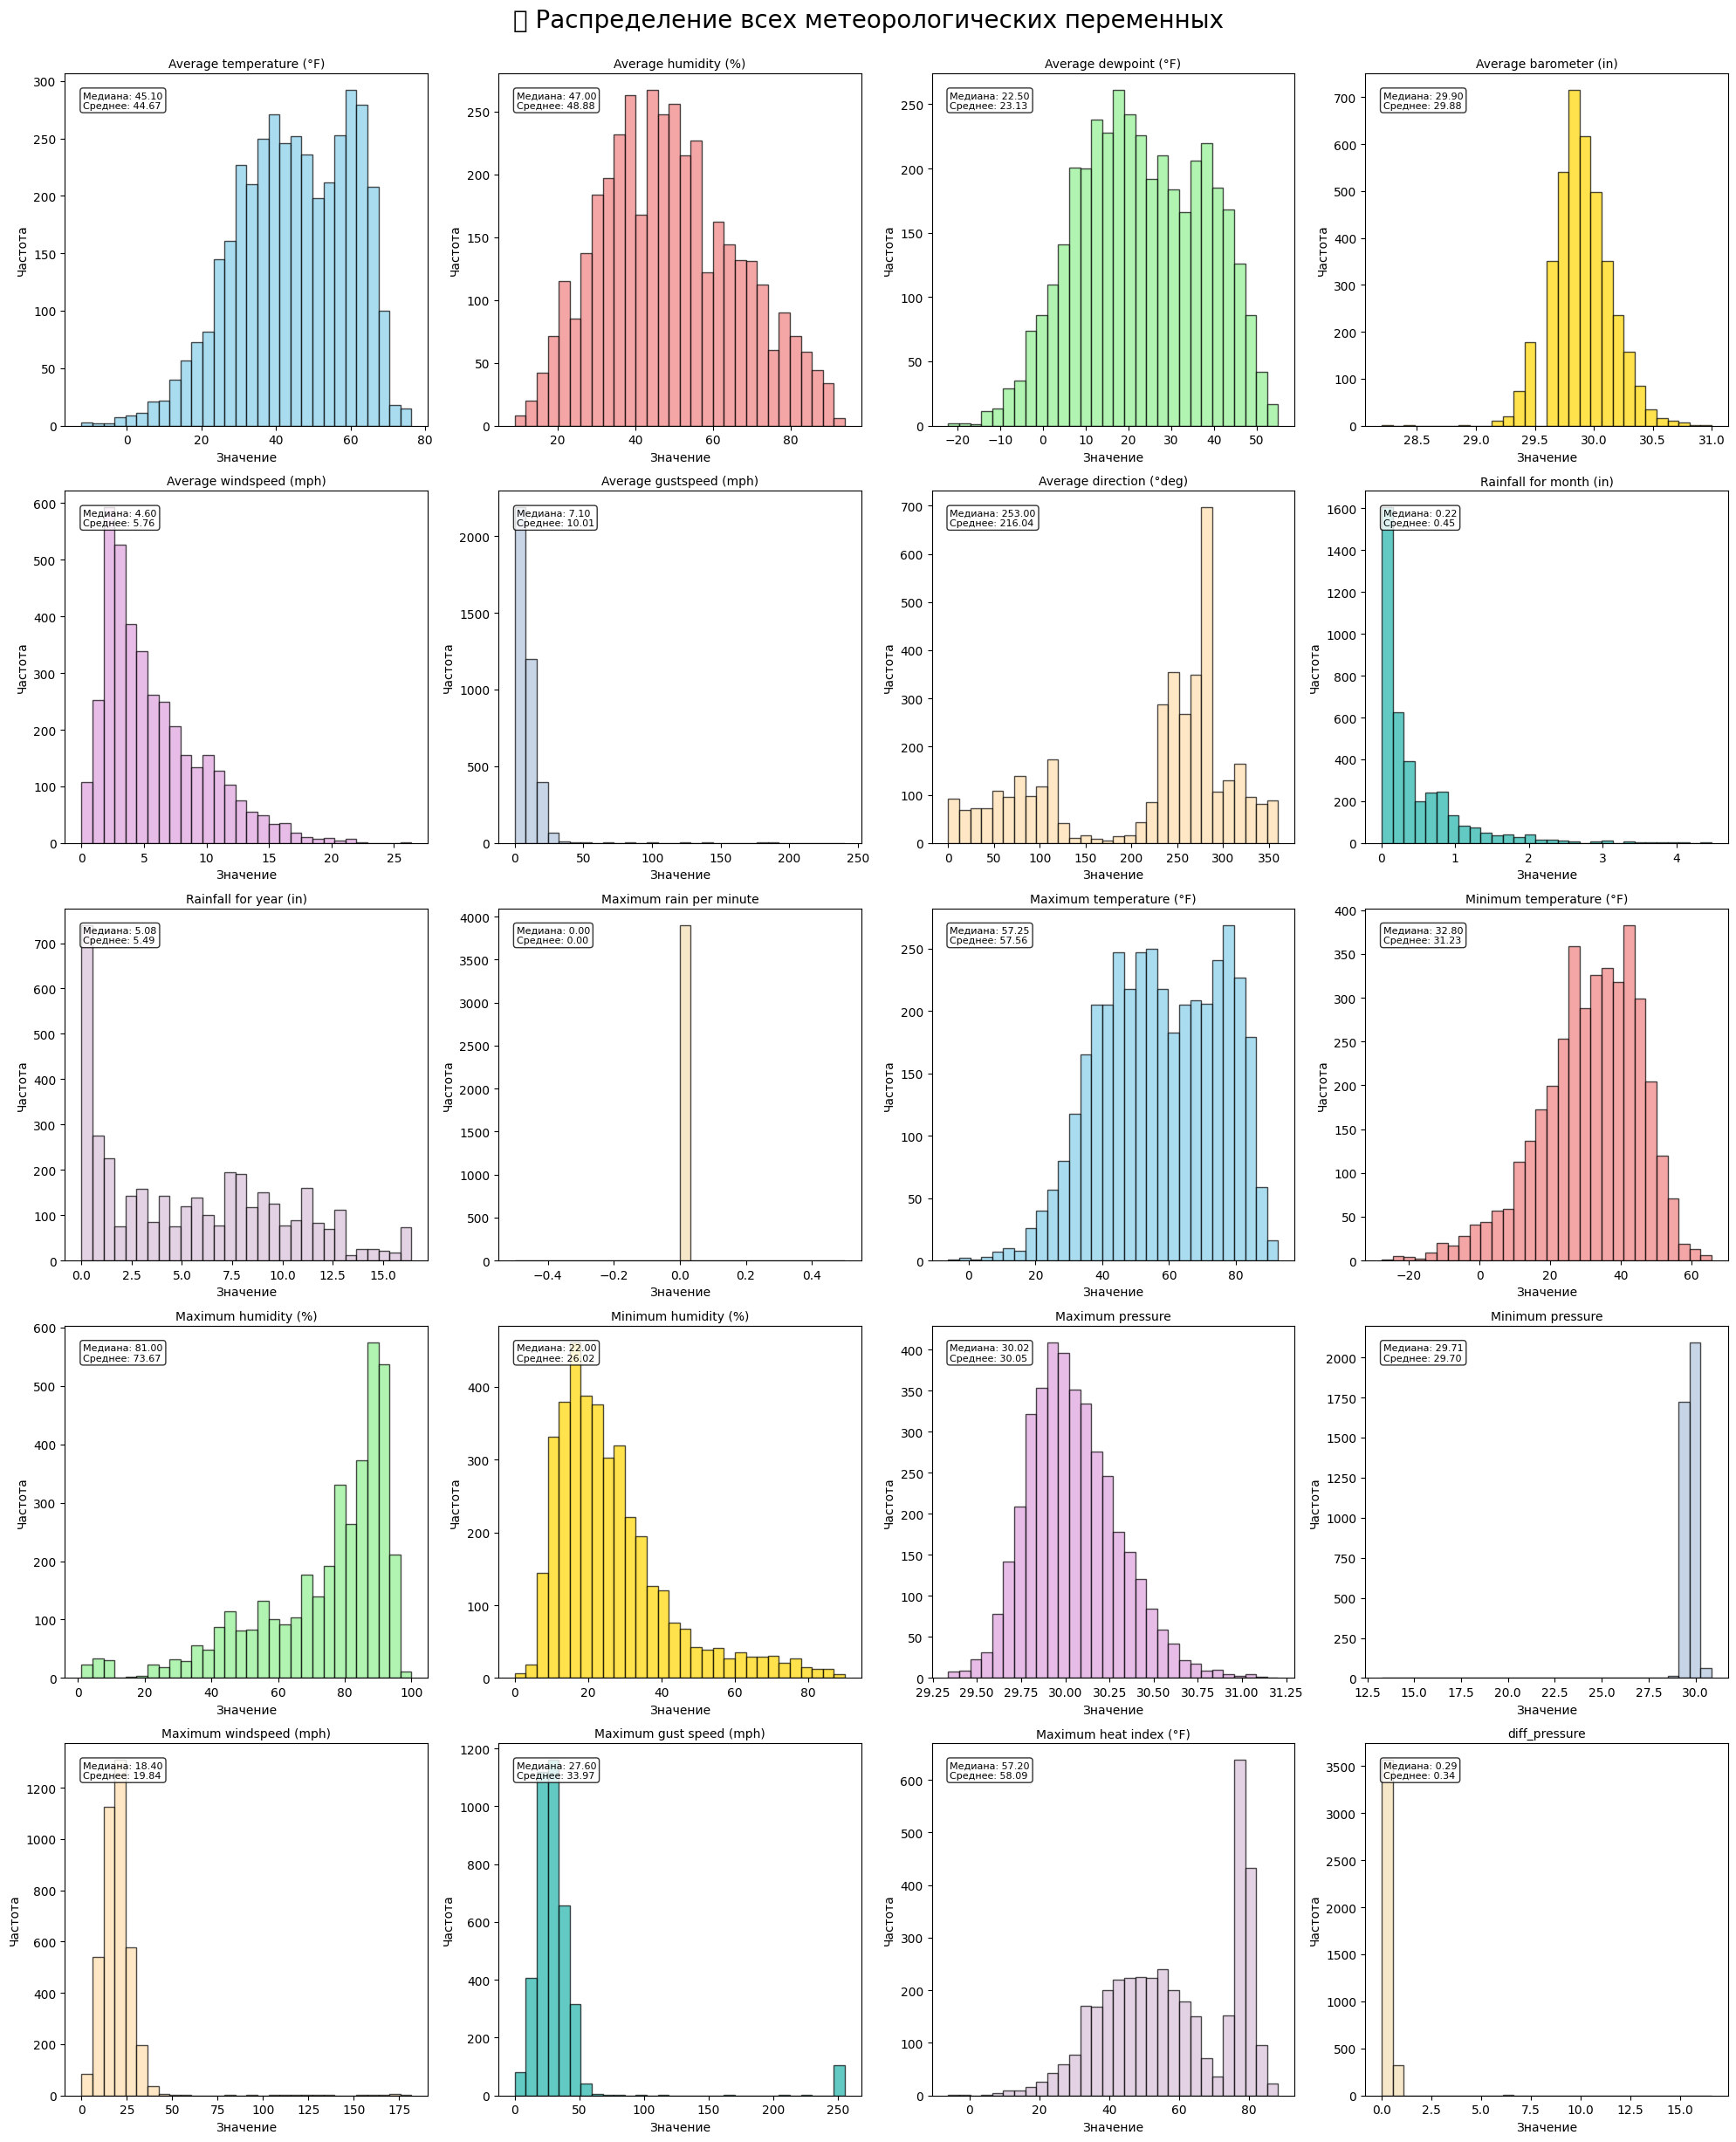

In [ ]:

# Расширенная визуализация для всех переменных
print("\n Полная визуализация ")

# Создаем сетку графиков для всех переменных
n_cols = 4
n_rows = (len(key_metrics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle(' Распределение всех метеорологических переменных', fontsize=20, y=0.98)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightsteelblue', 
          'navajowhite', 'lightseagreen', 'thistle', 'wheat']

for i, metric in enumerate(key_metrics):
    row = i // n_cols
    col = i % n_cols
    
    if n_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    
    if metric in df.columns:
        data = df[metric].dropna()
        if len(data) > 0:
            ax.hist(data, bins=30, alpha=0.7, edgecolor='black', 
                   color=colors[i % len(colors)])
            ax.set_title(f'{metric}', fontsize=10, pad=5)
            ax.set_xlabel('Значение')
            ax.set_ylabel('Частота')
            
            # Добавляем статистику на график
            stats_text = f'Медиана: {data.median():.2f}\nСреднее: {data.mean():.2f}'
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
                   verticalalignment='top', fontsize=8,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        else:
            ax.text(0.5, 0.5, 'Нет данных', transform=ax.transAxes, 
                   ha='center', va='center')
            ax.set_title(f'{metric}', fontsize=10)
    else:
        ax.text(0.5, 0.5, 'Колонка отсутствует', transform=ax.transAxes, 
               ha='center', va='center')
        ax.set_title(f'{metric}', fontsize=10)


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()




Распределения ключевых переменных выглядят логичными для метеорологических данных с некоторыми отклонениями, Примечательно, что некоторые переменные имеют широкий диапазон значений, что может указывать на сезонные изменения или выбросы.

5. Выбросы и Аномалии

In [24]:
# Функция для обнаружения выбросов
def detect_outliers_iqr(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < lower) | (series > upper)).sum()

numeric_cols = df.select_dtypes(include=np.number).columns
outliers = {col: detect_outliers_iqr(df[col]) for col in numeric_cols}
outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers'])
outliers_df['Outlier_Rate'] = outliers_df['Outliers'] / df.shape[0]
outliers_df.sort_values('Outlier_Rate', ascending=False).head(10)


,Outliers,Outlier_Rate
Minimum humidity (%),234,0.059969
Rainfall for month (in),228,0.058432
diff_pressure,169,0.043311
Average gustspeed (mph),136,0.034854
Maximum gust speed (mph),125,0.032035
Maximum humidity (%),109,0.027934
Average windspeed (mph),90,0.023065
Average barometer (in),83,0.021271
Minimum temperature (°F),66,0.016914
Minimum pressure,62,0.015889


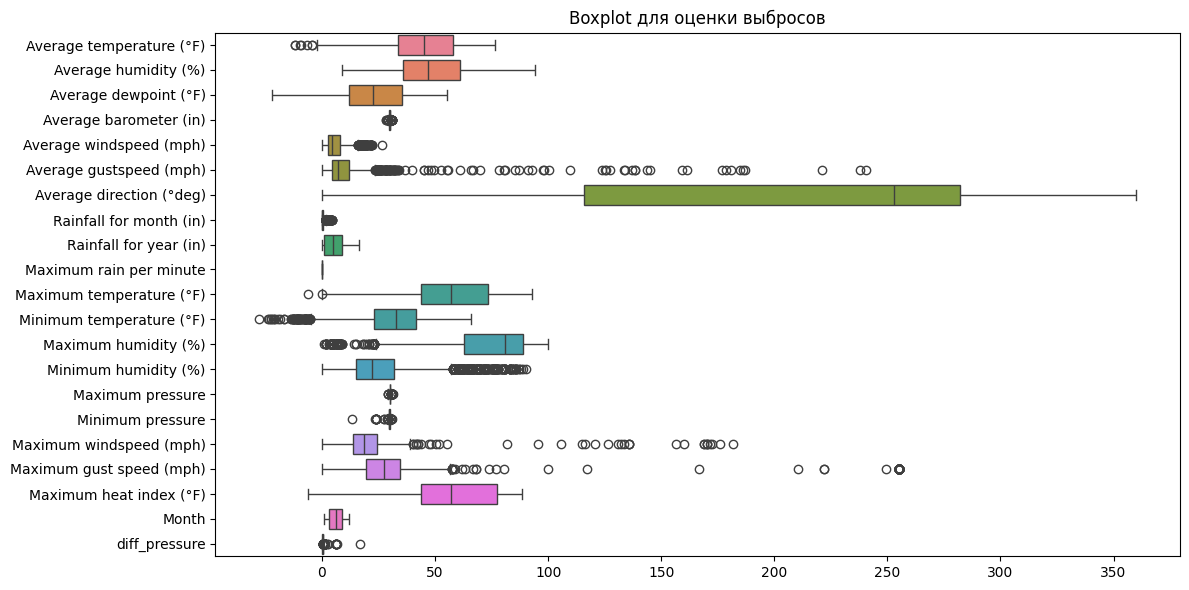

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplot для оценки выбросов')
plt.tight_layout()
plt.show()


Наибольшая доля выбросов зафиксирована в переменных:

1. Minimum humidity (%) — 5.9%
2. Rainfall for month (in) — 5.8%
3. diff_pressure — 4.3%
4. Average gustspeed (mph) — 3.5%

Эти выбросы могут соответствовать редким метеорологическим событиям, а не ошибкам измерений.
Boxplot подтверждает наличие экстремальных значений в этих признаках.

6. Временной Анализ

In [ ]:
# Анализ по годам и месяцам
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print(" Распределение данных по годам:")
year_summary = df['Year'].value_counts().sort_index()
display(year_summary)

 РАСПРЕДЕЛЕНИЕ ДАННЫХ ПО ГОДАМ:


Year
2009    331
2010    361
2011    250
2012    337
2013    320
2014    357
2015    351
2016    366
2017    336
2018    324
2019    359
2020    210
Name: count, dtype: int64

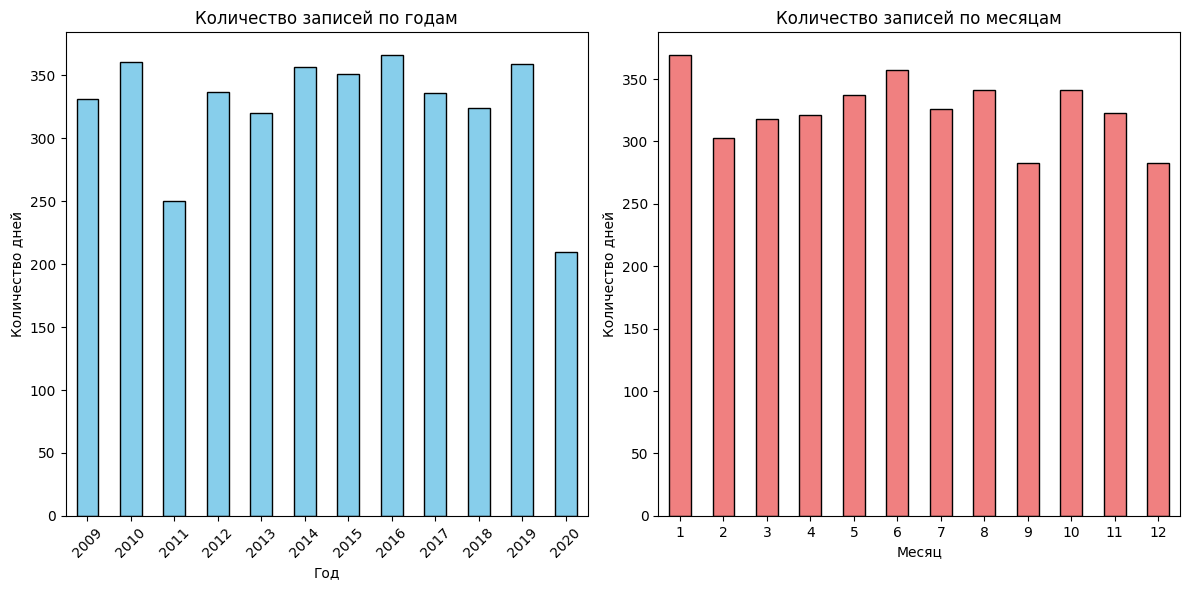

In [27]:
# Визуализация распределения по годам
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
year_summary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество записей по годам')
plt.xlabel('Год')
plt.ylabel('Количество дней')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
month_summary = df['Month'].value_counts().sort_index()
month_summary.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Количество записей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество дней')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

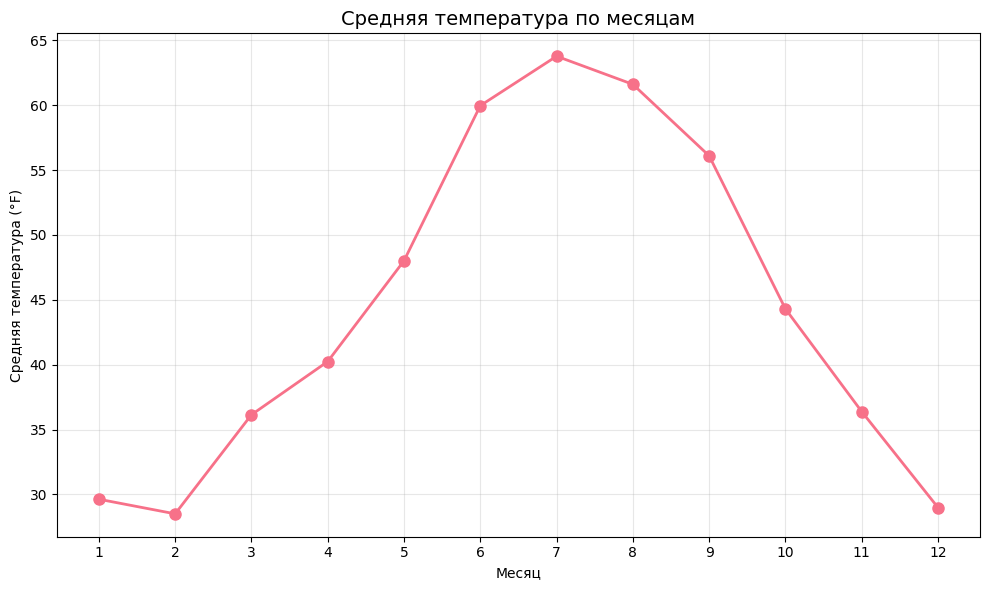

In [28]:
# Анализ сезонности температуры
monthly_avg_temp = df.groupby('Month')['Average temperature (°F)'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Средняя температура по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°F)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

Данные охватывают несколько лет с хорошим распределением по месяцам. Наблюдается четкая сезонная зависимость температуры, что подтверждает качество данных. Распределение по годам неравномерное, что нужно особенно учитывать при анализе.



7. Заключение и Рекомендации

In [ ]:
# Сводная оценка качества данных
print(" Итоговая оценка данных:")
print("~" * 50)

total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = (1 - missing_cells / total_cells) * 100

print(f" Полнота данных: {completeness:.1f}%")
print(f" Дубликаты: {df.duplicated().sum()}")

# Оценка временного ряда
temporal_completeness = (1 - len(missing_dates) / len(date_range)) * 100
print(f" Полнота временного ряда: {temporal_completeness:.1f}%")
print(f" Количество переменных: {len(df.columns)}")
print(f" Период наблюдений: {len(df['Year'].unique())} лет")

 ИТОГОВАЯ ОЦЕНКА КАЧЕСТВА ДАННЫХ:
 Полнота данных: 100.0%
 Дубликаты: 0
 Полнота временного ряда: 92.3%
 Количество переменных: 24
 Период наблюдений: 12 лет


Что в целом можно сделать еще:
1. Заполнить пропущенные значения соответствующими методами ( попробовать предсказать возможно )
2. Проанализировать сезонные поведения более детально
3. Исследовать корреляции между переменными
4. Проверить согласованность связанных измерений (мин/макс температура)

Проведенный EDA показывает, что данные в целом хорошего качества с высокой полнотой и логичной структурой. Основные проблемы - это выбросы в некоторых измерениях и незначительные пропуски. Данные готовы для более глубокого анализа, включая сезонную декомпозицию и прогнозирование.